<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/algorithm/kdtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import List, Optional

class KDNode:
    def __init__(self, point: List[float], left=None, right=None):
        self.point: List[float] = point
        self.left: Optional[KDNode] = left
        self.right: Optional[KDNode] = right

In [ ]:
import matplotlib.pyplot as plt

class KDTree:
    def __init__(self, points: List[List[float]]):
        self.root = self.build_tree(points)

    def build_tree(self, points: List[List[float]]):
        if not points:
            return None

        k = len(points[0])  # 次元数
        stack = [(points, 0, None, None)]  # (点のリスト, 次元, 親のノード, 位置)

        root: Optional[KDNode] = None
        while stack:
            pts, depth, parent, position = stack.pop()
            if not pts:
                continue

            axis = depth % k
            pts.sort(key=lambda x: x[axis])
            median = len(pts) // 2

            node = KDNode(pts[median])
            if not root:
                root = node
            else:
                if position == "left":
                    parent.left = node
                elif position == "right":
                    parent.right = node

            left_points = pts[:median]
            right_points = pts[median+1:]

            stack.append((right_points, depth + 1, node, "right"))
            stack.append((left_points, depth + 1, node, "left"))

        return root

    def print_tree(self, node, depth=0):
        if not node:
            return
        print("  " * depth + str(node.point))
        self.print_tree(node.left, depth + 1)
        self.print_tree(node.right, depth + 1)

    def plot_tree(self, ax, node, xmin, xmax, ymin, ymax, depth=0):
        if not node:
            return

        k = len(node.point)  # 次元数
        axis = depth % k

        if axis == 0:
            ax.plot([node.point[0], node.point[0]], [ymin, ymax], 'r-')
            self.plot_tree(ax, node.left, xmin, node.point[0], ymin, ymax, depth + 1)
            self.plot_tree(ax, node.right, node.point[0], xmax, ymin, ymax, depth + 1)
        else:
            ax.plot([xmin, xmax], [node.point[1], node.point[1]], 'b-')
            self.plot_tree(ax, node.left, xmin, xmax, ymin, node.point[1], depth + 1)
            self.plot_tree(ax, node.right, xmin, xmax, node.point[1], ymax, depth + 1)

        ax.plot(node.point[0], node.point[1], 'ko')
        ax.text(node.point[0] + 0.2, node.point[1] + 0.2, f'D{depth}', color='black', fontsize=12, ha='right')

    def plot_points(self, ax, points):
        for point in points:
            ax.plot(point[0], point[1], 'go')  # 'go' は緑の丸 (green circles) を意味します

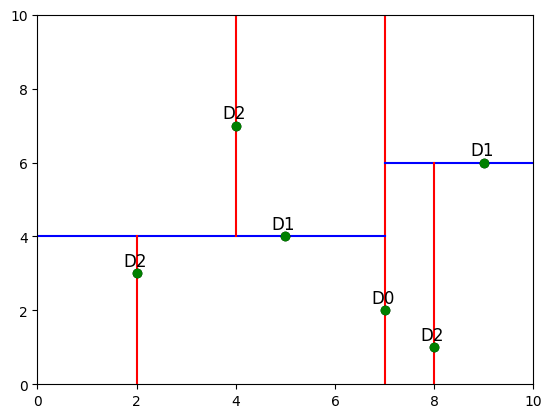

In [ ]:
# 使用例
points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
kd_tree = KDTree(points)

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
kd_tree.plot_tree(ax, kd_tree.root, 0, 10, 0, 10)
kd_tree.plot_points(ax, points)  # すべての点をプロット
plt.show()